In [1]:
import joblib
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Output from calc_intersection_stats.py
data = joblib.load("/Users/english/Downloads/stats.jl")

In [3]:
data.head()

,anno_count,anno_span,variant_count,trf_variant_count,known_repeat_variant_count
0,3,87,2,2,2
1,5,236,0,0,0
2,2,94,4,0,0
3,1,31,0,0,0
4,1,108,3,3,3


In [4]:
print("Number of regions", len(data))
print("Annos per-region", data['anno_count'].mean())
one_5bp = data["variant_count"] != 0
print("At least one >=5bp variant", (one_5bp).sum())
one_anno = data["trf_variant_count"] != 0
print("At least one annotated variant", one_anno.sum())
one_known = data["known_repeat_variant_count"] != 0
print("At least one known annotation variant", one_known.sum())
print(">=5bp variants in tr", data["variant_count"].sum())
print("Annotated variants", data["trf_variant_count"].sum())
print("Known annotation variants", data["known_repeat_variant_count"].sum())

Number of regions 938088
Annos per-region 2.492244864021286
At least one >=5bp variant 445173
At least one annotated variant 409010
At least one known annotation variant 402538
>=5bp variants in tr 3278848
Annotated variants 3027762
Known annotation variants 2892229


[Text(0.5, 1.0, 'Annotations per-Region'), (0.5, 10.5)]

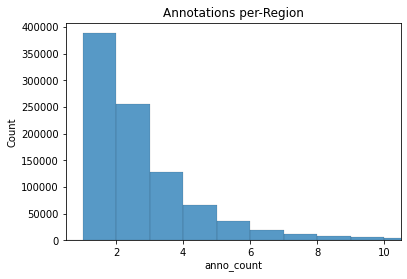

In [7]:
p = sb.histplot(data=data, x="anno_count", binwidth=1)
p.set(title="Annotations per-Region", xlim=(0.5,10.5))

In [128]:
view = {"<5bp\nonly": (~one_5bp).sum(),
        "novel": (one_anno & ~one_known).sum(),
        "known": one_known.sum(),

        "unknown": (one_5bp & ~one_anno).sum(),
       }
view = pd.Series(view).to_frame()
view.columns = ["Counts"]
view["Percent"] = view["Counts"] / view["Counts"].sum()

,Counts,Percent
<5bp\nonly,492915,0.525446
novel,6472,0.006899
known,402538,0.429105
unknown,36163,0.038550


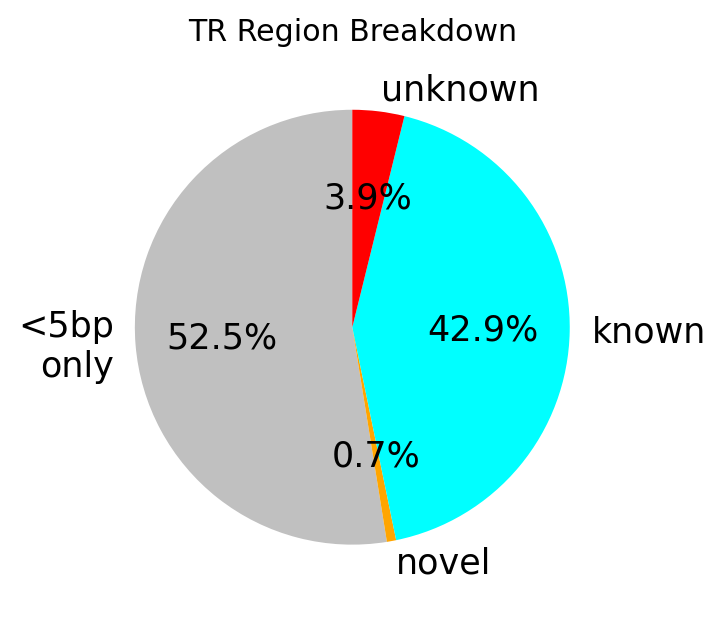

In [129]:
plt.figure(dpi=180)
plt.pie(view['Percent'], labels=view.index, autopct="%.1f%%",
        textprops={"size":14},
        startangle=90,
       colors=['silver', 'orange', 'cyan', 'red'])
plt.title("TR Region Breakdown")
view

In [117]:
total = data["variant_count"].sum()
unannotated = total - data['trf_variant_count'].sum()
known = data["known_repeat_variant_count"].sum()
novel = data['trf_variant_count'].sum()  - known

view = {"unknown": unannotated,
        "novel": novel,
        "known": known,
       
       }
view = pd.Series(view).to_frame()
view.columns = ["Counts"]
view["Percent"] = view["Counts"] / view["Counts"].sum()

,Counts,Percent
unknown,251086,0.076578
novel,135533,0.041336
known,2892229,0.882087


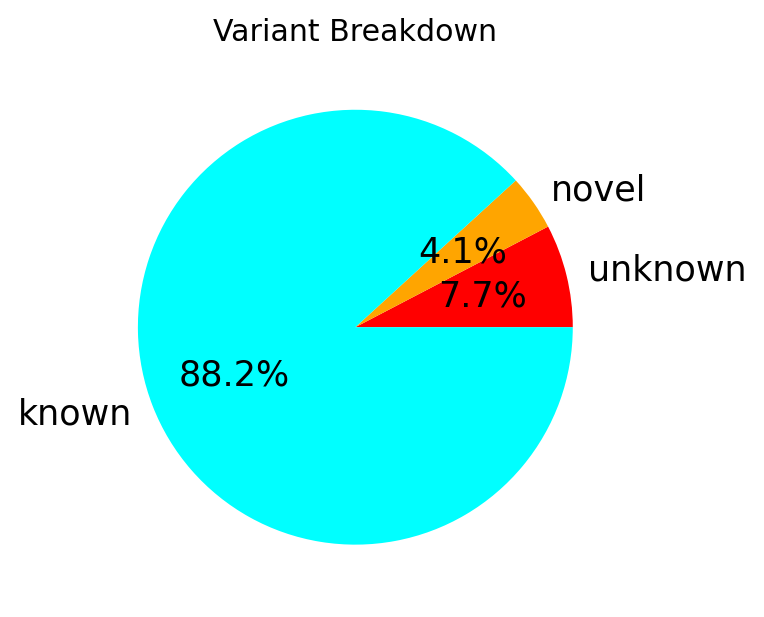

In [118]:
plt.figure(dpi=180)
plt.pie(view['Percent'], labels=view.index, autopct="%.1f%%",  textprops={"size":14}, 
        colors=['red', 'orange', 'cyan'] )
plt.title("Variant Breakdown")
view